# **Predicting Water Quality**

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

# Reading the Data

In [2]:
df = pd.read_csv('D:\ML\Water Quality Prediction\Dataset\water_potability.csv')
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


# Understanding the Data

In [3]:
df.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

In [4]:
df.shape

(3276, 10)

In [5]:
df.size

32760

In [6]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [7]:
df.max()

ph                    14.000000
Hardness             323.124000
Solids             61227.196008
Chloramines           13.127000
Sulfate              481.030642
Conductivity         753.342620
Organic_carbon        28.300000
Trihalomethanes      124.000000
Turbidity              6.739000
Potability             1.000000
dtype: float64

In [8]:
df.min()

ph                   0.000000
Hardness            47.432000
Solids             320.942611
Chloramines          0.352000
Sulfate            129.000000
Conductivity       181.483754
Organic_carbon       2.200000
Trihalomethanes      0.738000
Turbidity            1.450000
Potability           0.000000
dtype: float64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [10]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [11]:
df.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.082096,-0.089288,-0.034350,0.018203,0.018614,0.043503,0.003354,-0.039057,-0.003556
Hardness,0.082096,1.000000,-0.046899,-0.030054,-0.106923,-0.023915,0.003610,-0.013013,-0.014449,-0.013837
Solids,-0.089288,-0.046899,1.000000,-0.070148,-0.171804,0.013831,0.010242,-0.009143,0.019546,0.033743
Chloramines,-0.034350,-0.030054,-0.070148,1.000000,0.027244,-0.020486,-0.012653,0.017084,0.002363,0.023779
Sulfate,0.018203,-0.106923,-0.171804,0.027244,1.000000,-0.016121,0.030831,-0.030274,-0.011187,-0.023577
Conductivity,0.018614,-0.023915,0.013831,-0.020486,-0.016121,1.000000,0.020966,0.001285,0.005798,-0.008128
Organic_carbon,0.043503,0.003610,0.010242,-0.012653,0.030831,0.020966,1.000000,-0.013274,-0.027308,-0.030001
Trihalomethanes,0.003354,-0.013013,-0.009143,0.017084,-0.030274,0.001285,-0.013274,1.000000,-0.022145,0.007130
Turbidity,-0.039057,-0.014449,0.019546,0.002363,-0.011187,0.005798,-0.027308,-0.022145,1.000000,0.001581
Potability,-0.003556,-0.013837,0.033743,0.023779,-0.023577,-0.008128,-0.030001,0.007130,0.001581,1.000000


In [12]:
df.nunique()

ph                 2785
Hardness           3276
Solids             3276
Chloramines        3276
Sulfate            2495
Conductivity       3276
Organic_carbon     3276
Trihalomethanes    3114
Turbidity          3276
Potability            2
dtype: int64

In [13]:
df.isnull().values.any()

True

# Exploratory Data Analysis / Visualization

<AxesSubplot:>

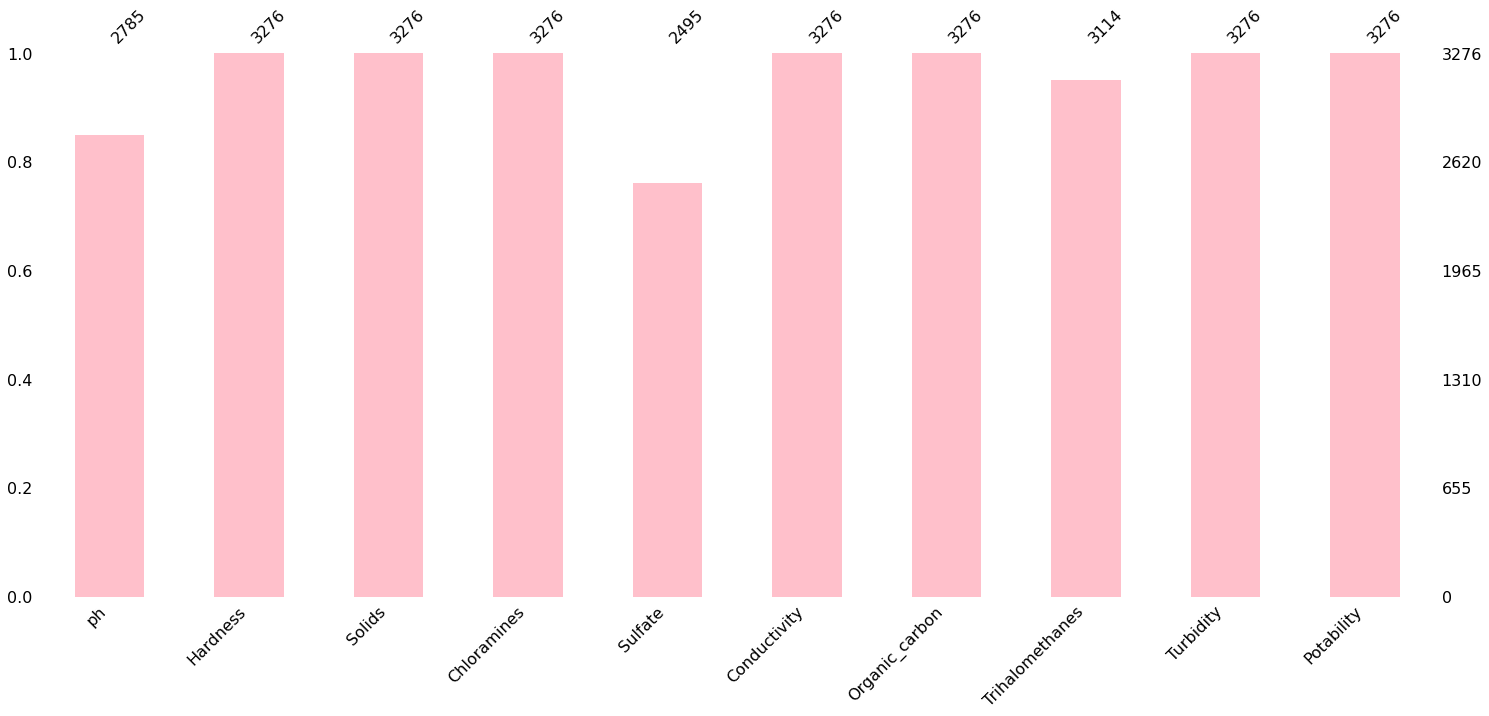

In [14]:
import missingno as no
no.bar(df, color='pink')

<AxesSubplot:>

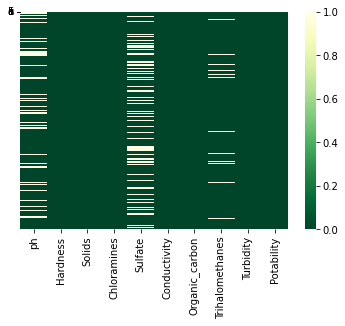

In [15]:
sns.heatmap(df.isnull(), yticklabels='False', cmap='YlGn_r')

In [16]:
df = df.dropna()

<AxesSubplot:ylabel='Potability'>

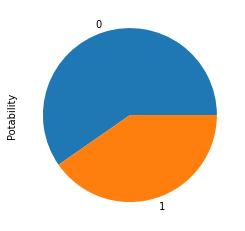

In [17]:
df.Potability.value_counts().plot(kind ='pie')

C:\Users\Raman\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Potability', ylabel='count'>

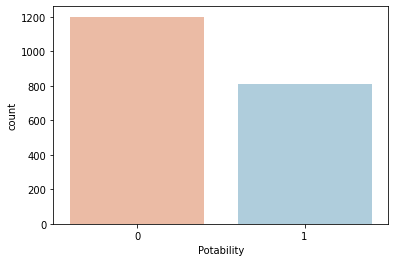

In [18]:
sns.countplot(df['Potability'], label='Count', palette='RdBu')

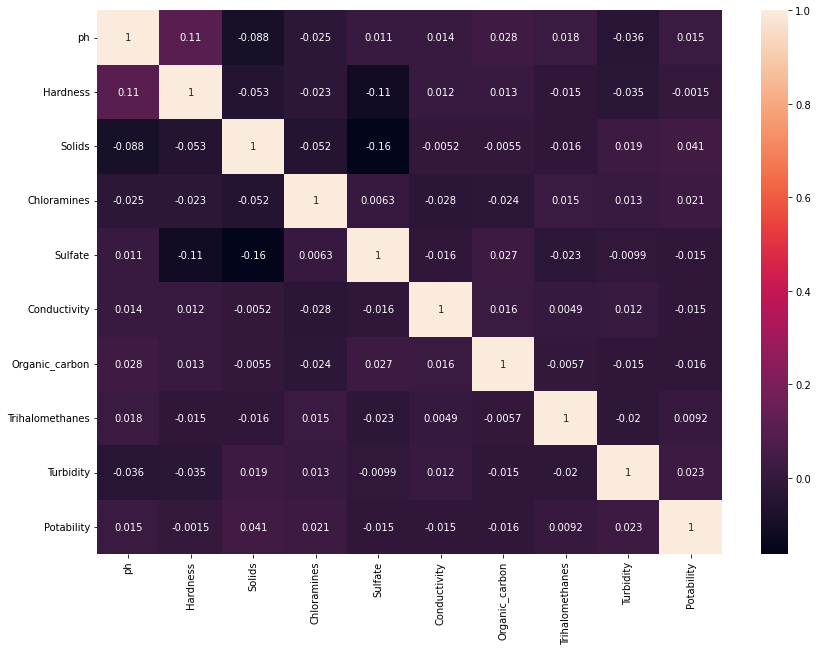

In [19]:
plt.figure(figsize=(14,10))
hm = sns.heatmap(df.corr(), annot=True)
plt.show()

C:\Users\Raman\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ph', ylabel='Hardness'>

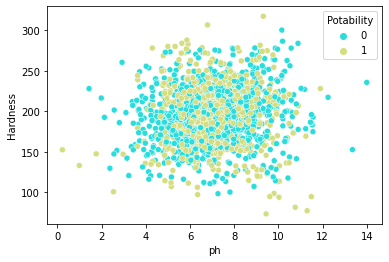

In [20]:
sns.scatterplot(df['ph'], df['Hardness'], hue=df.Potability, data=df, palette='rainbow')

C:\Users\Raman\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


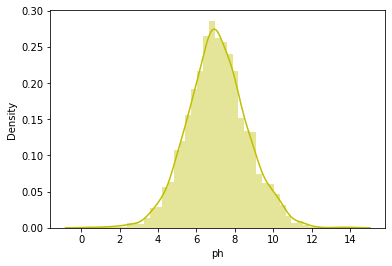

In [21]:
sns.distplot(df['ph'], color='y')
plt.show()

C:\Users\Raman\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Potability', ylabel='Chloramines'>

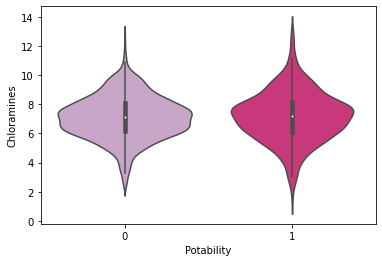

In [22]:
sns.violinplot(df["Potability"], df["Chloramines"], palette='PuRd')

C:\Users\Raman\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Potability', ylabel='Turbidity'>

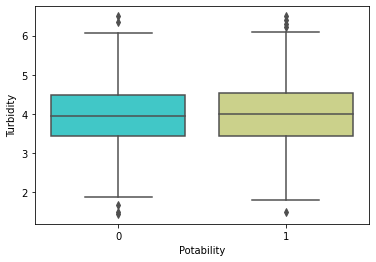

In [23]:
sns.boxplot(df['Potability'], df['Turbidity'], data=df, palette='rainbow')

C:\Users\Raman\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Raman\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


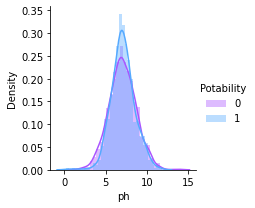

In [24]:
sns.FacetGrid(df, hue='Potability', palette='cool_r').map(sns.distplot, 'ph').add_legend()

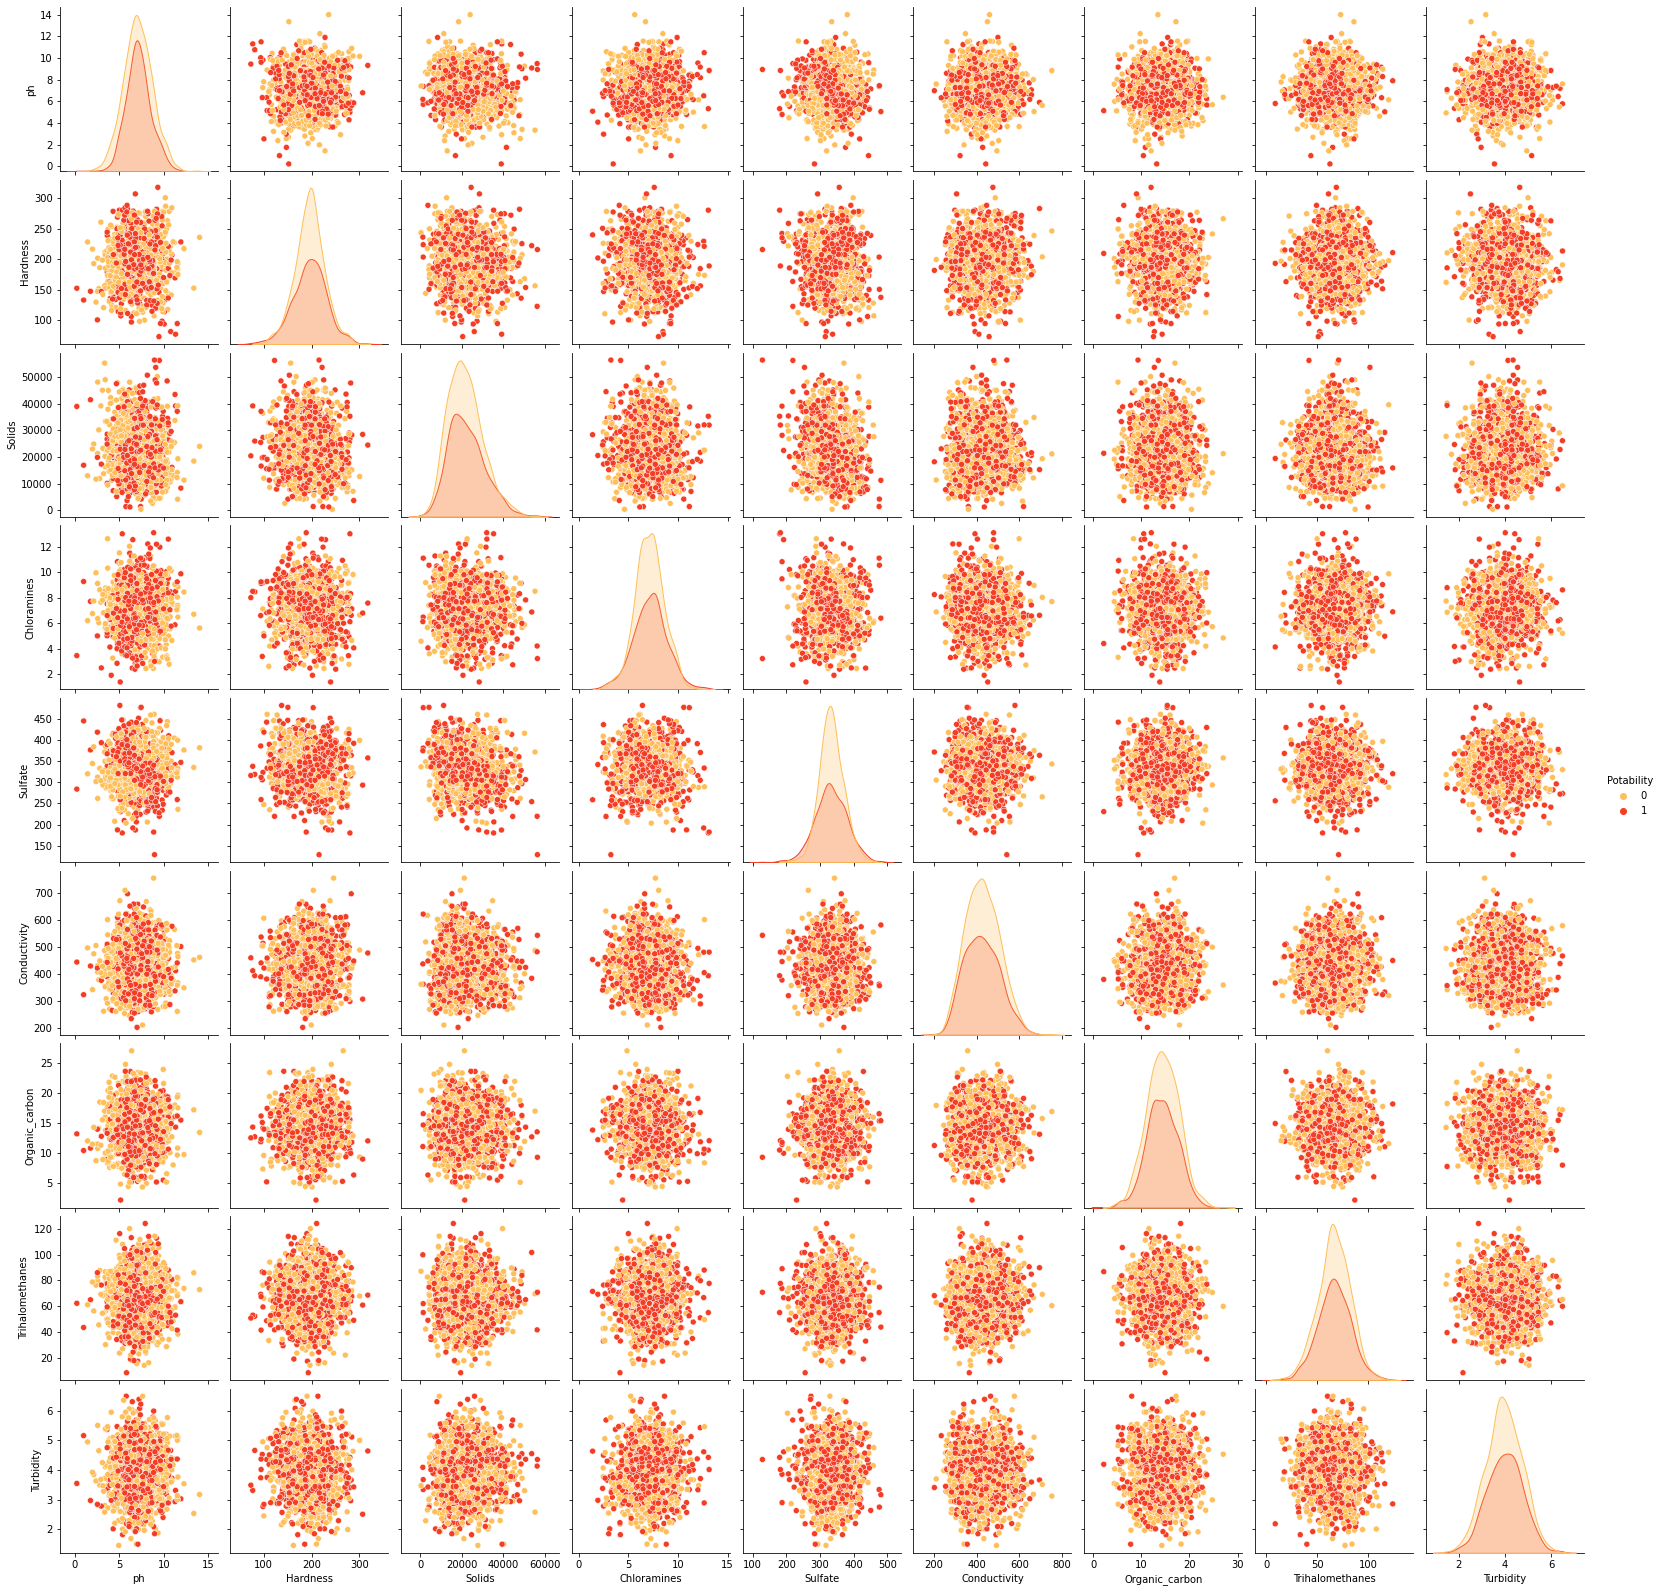

In [25]:
sns.pairplot(df, hue='Potability', vars=['ph', 'Hardness',	'Solids',	'Chloramines',	'Sulfate',	'Conductivity',	'Organic_carbon',	'Trihalomethanes',	'Turbidity'], palette='YlOrRd')

# Splitting the Data into Dependent and Indpendent variables

In [26]:
# x = df.drop(['Potability'], axis=1)
# y = df['Potability']

In [27]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [28]:
x.shape

(2011, 9)

In [29]:
x[:5]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425


In [30]:
y[:5]

3    0
4    0
5    0
6    0
7    0
Name: Potability, dtype: int64

# Training and Testing the Data

In [31]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.33, random_state=42)

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Logistic Regression

In [33]:
lm = LogisticRegression(random_state=5)
lm.fit(xtrain, ytrain)

LogisticRegression(random_state=5)

## Prediction

In [34]:
ypred_train = lm.predict(xtrain)
ypred_test = lm.predict(xtest)
print(ypred_test)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [35]:
df = pd.DataFrame(ypred_test, ytest)
df.head()

,0
Potability,
0,0
0,0
0,0
0,0
1,0


## Confusion Matrix

In [36]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [37]:
cm = confusion_matrix(ytest, ypred_test)
cm

array([[398,   1],
       [263,   2]], dtype=int64)

<AxesSubplot:>

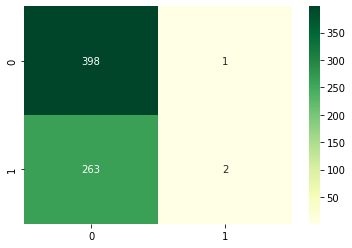

In [38]:
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGn" ,fmt='g')

## Accuracy Score

In [39]:
print("Accuracy of training data:", accuracy_score(ytrain, ypred_train)*100)
ac1 = accuracy_score(ytest, ypred_test)*100
print("Accuracy of testing data:", ac1)

Accuracy of training data: 59.613956941351155
Accuracy of testing data: 60.24096385542169


# Support Vector Machine

In [40]:
svc = SVC(C=10)
svc.fit(xtrain, ytrain)

SVC(C=10)

## Prediction

In [41]:
ypred_train = svc.predict(xtrain)
ypred_test = svc.predict(xtest)
# print(ypred_test)

## Confusion Matrix

In [42]:
cmt = np.array(confusion_matrix(ypred_test, ytest))
cmt

array([[399, 264],
       [  0,   1]], dtype=int64)

<AxesSubplot:>

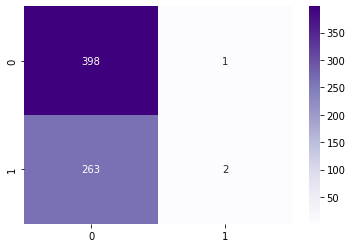

In [43]:
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="Purples" ,fmt='g')

# Accuracy

In [44]:
print("Accuracy of training data:", accuracy_score(ytrain, ypred_train)*100)
ac2 = accuracy_score(ytest, ypred_test)*100
print("Accuracy of testing data:", ac2)

Accuracy of training data: 59.53971789161099
Accuracy of testing data: 60.24096385542169


# Decission Tree

In [45]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(xtrain, ytrain)

DecisionTreeClassifier(random_state=42)

## Prediction

In [46]:
ypred_train = dt.predict(xtrain)
ypred_test = dt.predict(xtest)

## Confusion Matrix

In [47]:
cm = np.array(confusion_matrix(ypred_test, ytest))
cm

array([[253, 132],
       [146, 133]], dtype=int64)

<AxesSubplot:>

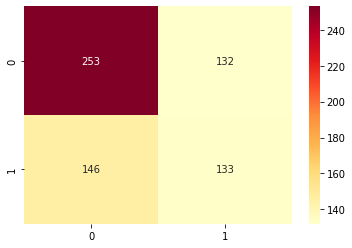

In [48]:
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlOrRd" ,fmt='g')

## Accuracy

In [49]:
print("Accuracy of training data:", accuracy_score(ytrain, ypred_train)*100)
ac3 = accuracy_score(ytest, ypred_test)*100
print("Accuracy of testing data:", ac3)

Accuracy of training data: 100.0
Accuracy of testing data: 58.13253012048193


# K Nearest Neighbor

In [50]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(xtrain, ytrain)

KNeighborsClassifier(n_neighbors=4)

## Prediction

In [51]:
ypred_train = knn.predict(xtrain)
ypred_test = knn.predict(xtest)

## Confusion Matrix

In [52]:
cm = np.array(confusion_matrix(ypred_test, ytest))
cm

array([[328, 210],
       [ 71,  55]], dtype=int64)

<AxesSubplot:>

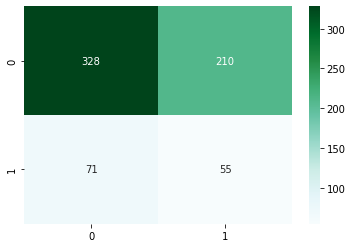

In [53]:
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="BuGn" ,fmt='g')

## Accuracy

In [54]:
print("Accuracy of training data:", accuracy_score(ytrain, ypred_train)*100)
ac4 = accuracy_score(ytest, ypred_test)*100
print("Accuracy of testing data:", ac4)

Accuracy of training data: 69.56198960653303
Accuracy of testing data: 57.68072289156626


# Naive Bayes

In [55]:
gnb = GaussianNB()
gnb.fit(xtrain, ytrain)

GaussianNB()

## Prediction

In [56]:
ypred_train = gnb.predict(xtrain)
ypred_test = gnb.predict(xtest)

## Confusion Matrix

In [57]:
cm = np.array(confusion_matrix(ypred_test, ytest))
cm

array([[344, 199],
       [ 55,  66]], dtype=int64)

<AxesSubplot:>

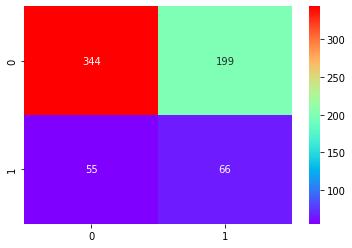

In [58]:
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="rainbow" ,fmt='g')

## Accuracy

In [59]:
print("Accuracy of training data:", accuracy_score(ytrain, ypred_train)*100)
ac5 = accuracy_score(ytest, ypred_test)*100
print("Accuracy of testing data:", ac5)

Accuracy of training data: 62.28656273199703
Accuracy of testing data: 61.74698795180723


# Random Forest Classifier

In [60]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(xtrain, ytrain)

RandomForestClassifier(random_state=42)

## Prediction

In [61]:
ypred_train = rf.predict(xtrain)
ypred_test = rf.predict(xtest)

## Confusion Mtrix

In [62]:
cm = np.array(confusion_matrix(ypred_test, ytest))
cm

array([[342, 148],
       [ 57, 117]], dtype=int64)

<AxesSubplot:>

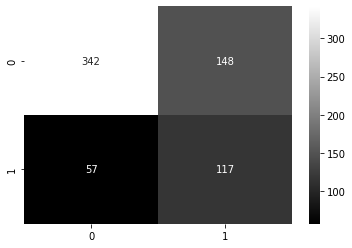

In [63]:
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="gray" ,fmt='g')

## Accuracy

In [64]:
print("Accuracy of training data:", accuracy_score(ytrain, ypred_train)*100)
ac6 = accuracy_score(ytest, ypred_test)*100
print("Accuracy of testing data:", ac6)

Accuracy of training data: 100.0
Accuracy of testing data: 69.12650602409639


# Comparing Accuracy of Different Models

In [65]:
accuracy =  {ac1: 'Logistic Regression', ac2: 'SVM', ac3:'Decission Tree', ac4:'KNN', ac5: 'Naive Bayes', ac6: 'Random Forest'}

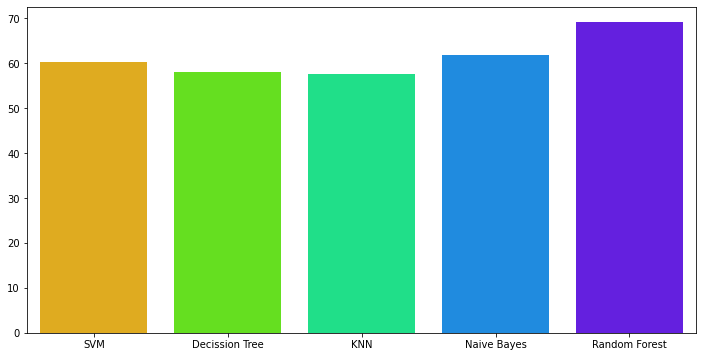

In [66]:
plt.figure(figsize=(12, 6))
model_accuracies = list(accuracy.values())
model_names = list(accuracy.keys())
sns.barplot(x=model_accuracies, y=model_names, palette='gist_rainbow');

The model with highest Accuracy score is *Random Forest CLassifier* with an accuracy of **69.12**